Nama : Andreas Restuawanta Christwara

NIM : 5312422036

Prodi : Teknik Komputer

Matkul : Pengolahan Sinyal Digital

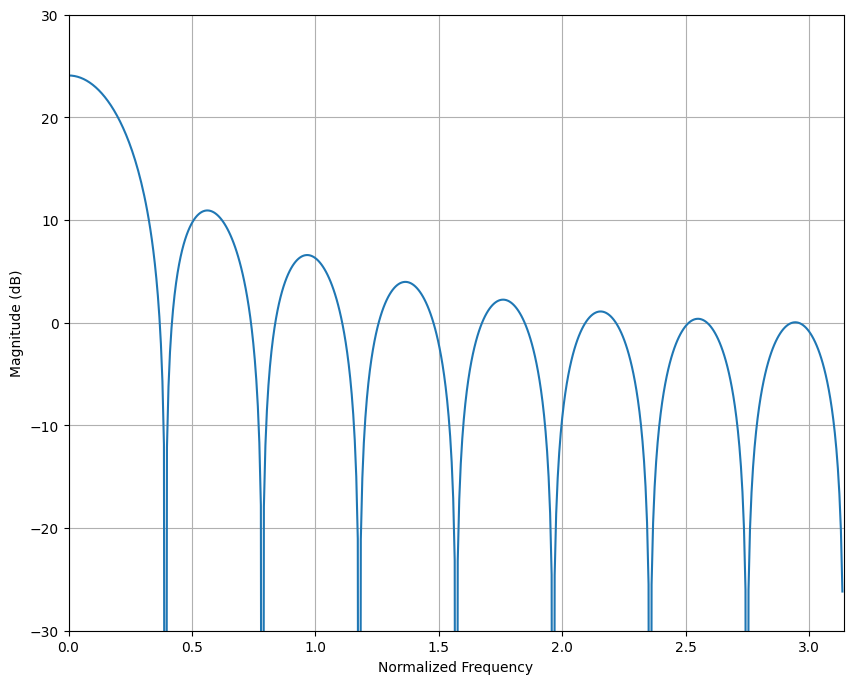

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Source code tersebut adalah program Python yang menggunakan library NumPy, Matplotlib, dan SciPy untuk menghitung dan memvisualisasikan respons frekuensi dari sebuah filter FIR (Finite Impulse Response) dengan panjang 16 sampel.

1.	import numpy as np: Mengimpor library NumPy yang digunakan untuk operasi numerik dan array.
2.	import matplotlib.pyplot as plt: Mengimpor library Matplotlib untuk visualisasi data, khususnya untuk membuat plot.
3.	import scipy.signal as signal: Mengimpor modul signal dari library SciPy yang menyediakan fungsi-fungsi untuk pengolahan sinyal.
4.	h=np.ones(16): Membuat sebuah array NumPy dengan 16 elemen bernilai 1. Array ini merepresentasikan koefisien filter FIR.
5.	omega, H =signal.freqz(h): Menghitung respons frekuensi dari filter FIR dengan koefisien h. freqz adalah fungsi dari SciPy yang mengembalikan vektor frekuensi omega (dalam rad/sampel) dan respons frekuensi kompleks H.
6.	plt.figure(figsize=(10,8)): Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
7.	plt.plot(omega, 20*np.log10(abs(H)+1e-6)): Memplot respons frekuensi dalam skala desibel (dB). abs(H) mengambil nilai absolut dari respons frekuensi kompleks. 1e-6 ditambahkan untuk menghindari error log dari nilai 0. 20*np.log10(...) mengonversi nilai ke skala desibel.
8.	plt.axis([0, 3.14, -30, 30]): Menetapkan batas sumbu x (frekuensi) dari 0 hingga π dan sumbu y (magnitude) dari -30 dB hingga 30 dB.
9.	plt.xlabel('Normalized Frequency'): Memberi label untuk sumbu x dengan 'Normalized Frequency'.
10.	plt.ylabel('Magnitude (dB)'): Memberi label untuk sumbu y dengan 'Magnitude (dB)'.
11.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menghitung respons frekuensi dari filter FIR dengan koefisien yang seragam (ones) dan memvisualisasikannya dalam domain frekuensi. Plot akan menunjukkan magnitude (dalam dB) dari respons frekuensi terhadap frekuensi yang dinormalisasi (dari 0 hingga π rad/sampel).

In [4]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512

    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)

    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

Source code tersebut merupakan sebuah fungsi Python bernama errfunc yang digunakan untuk menghitung error antara respons frekuensi aktual dari sebuah filter FIR (Finite Impulse Response) dengan respons frekuensi yang diinginkan. Fungsi ini dapat digunakan dalam proses desain filter FIR untuk meminimalkan error tersebut.

1.	def errfunc(h): Mendefinisikan sebuah fungsi bernama errfunc yang menerima satu argumen h (koefisien filter FIR).
2.	numfreqsamples=512 Menetapkan jumlah sampel frekuensi yang akan digunakan untuk menghitung respons frekuensi.
3.	pb=int(numfreqsamples/4.0) Menghitung panjang band lolos (passband) yang diinginkan, yaitu seperempat dari numfreqsamples.
4.	tb=int(numfreqsamples/8.0) Menghitung panjang band transisi (transition band) yang diinginkan, yaitu seperdelapan dari numfreqsamples.
5.	w, H = signal.freqz(h,1,numfreqsamples) Menghitung respons frekuensi aktual H dari filter FIR dengan koefisien h menggunakan fungsi freqz dari library SciPy. 1 adalah normalisasi frekuensi, dan numfreqsamples adalah jumlah sampel frekuensi yang digunakan.
6.	H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))) Membuat respons frekuensi yang diinginkan H_desired dengan nilai 1 pada band lolos dan 0 pada band stop.
7.	weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))) Membuat vektor bobot yang memberikan penekanan lebih besar pada band stop dibandingkan dengan band lolos dan band transisi.
8.	err = np.sum(np.abs(H-H_desired)*weights) Menghitung error antara respons frekuensi aktual H dan respons frekuensi yang diinginkan H_desired dengan mempertimbangkan bobot yang telah ditetapkan.
9.	return err Mengembalikan nilai error yang telah dihitung.

Fungsi errfunc ini dapat digunakan dalam algoritma optimasi untuk mencari koefisien filter FIR yang meminimalkan error antara respons frekuensi aktual dan respons frekuensi yang diinginkan. Dalam proses optimasi, koefisien filter FIR akan diubah-ubah hingga error yang dihitung oleh errfunc menjadi minimum.

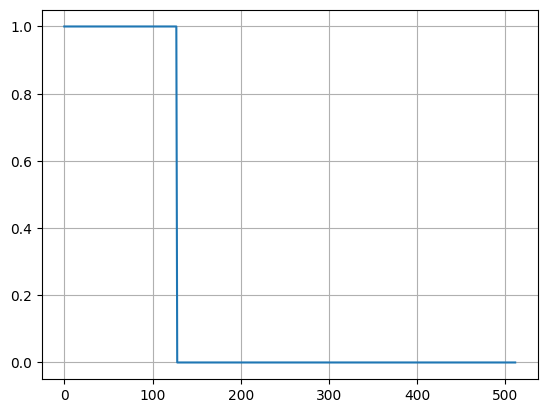

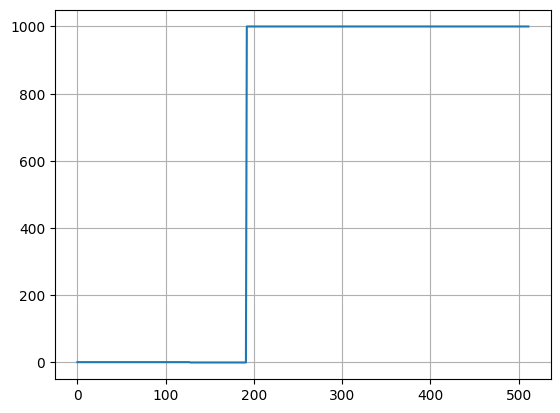

In [7]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

Source code tersebut menggunakan library NumPy dan Matplotlib untuk memvisualisasikan dua plot yang terkait dengan desain filter FIR (Finite Impulse Response).

1.	import matplotlib.pyplot as plt dan import numpy as np: Mengimpor library Matplotlib untuk visualisasi data dan NumPy untuk operasi numerik dan array.
2.	numfreqsamples=512: Menetapkan jumlah sampel frekuensi yang akan digunakan.
3.	pb=int(numfreqsamples/4.0): Menghitung panjang band lolos (passband) yang diinginkan, yaitu seperempat dari numfreqsamples.
4.	tb=int(numfreqsamples/8.0): Menghitung panjang band transisi (transition band) yang diinginkan, yaitu seperdelapan dari numfreqsamples.
5.	plt.figure(): Membuat sebuah figure baru untuk plot pertama.
6.	plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))): Memplot respons frekuensi yang diinginkan (H_Desired) dengan nilai 1 pada band lolos dan 0 pada band stop.
7.	plt.grid(): Menambahkan grid pada plot.
8.	plt.figure(): Membuat sebuah figure baru untuk plot kedua.
9.	plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))): Memplot vektor bobot yang memberikan penekanan lebih besar pada band stop dibandingkan dengan band lolos dan band transisi.
10.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menampilkan dua plot:

1.	Plot pertama menunjukkan respons frekuensi yang diinginkan (H_Desired) untuk filter FIR. Sumbu x merepresentasikan frekuensi yang dinormalisasi, dan sumbu y merepresentasikan amplitudo. Plot ini menampilkan nilai 1 pada band lolos dan 0 pada band stop.
2.	Plot kedua menunjukkan vektor bobot yang digunakan dalam proses optimasi untuk mencari koefisien filter FIR yang meminimalkan error antara respons frekuensi aktual dan H_Desired. Vektor bobot ini memberikan penekanan lebih besar pada band stop (nilai 1000) dibandingkan dengan band lolos dan band transisi (nilai 1).

Kedua plot ini dapat membantu memvisualisasikan spesifikasi yang diinginkan untuk desain filter FIR dan memberikan gambaran tentang bagaimana bobot akan diterapkan pada error selama proses optimasi.

In [8]:
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)

[-0.00048849 -0.00256066 -0.00797149 -0.01827691 -0.03362503 -0.05180896
 -0.06848414 -0.07868548 -0.07906171 -0.06946653 -0.05307233 -0.0348055
 -0.0191359  -0.00845376 -0.00277385 -0.0005416 ]


Source code tersebut menggunakan library SciPy untuk melakukan optimasi dalam mendesain filter FIR (Finite Impulse Response) dengan meminimalkan error antara respons frekuensi aktual dan respons frekuensi yang diinginkan.

1.	import scipy.optimize as opt: Mengimpor modul optimize dari library SciPy yang menyediakan fungsi-fungsi untuk optimasi numerik.
2.	minout=opt.minimize(errfunc,np.random.rand(16)): Memanggil fungsi minimize dari modul optimize untuk melakukan optimasi. Fungsi errfunc yang telah didefinisikan sebelumnya digunakan sebagai fungsi objektif yang akan diminimalkan. np.random.rand(16) digunakan sebagai tebakan awal untuk koefisien filter FIR dengan 16 elemen yang diinisialisasi secara acak antara 0 dan 1. Hasil dari optimasi disimpan dalam variabel minout.
3.	h=minout.x: Mengambil nilai koefisien filter FIR yang telah dioptimasi dari atribut x dalam objek minout.
4.	print(h): Mencetak nilai koefisien filter FIR yang telah dioptimasi.

Dalam hal ini, fungsi errfunc yang telah didefinisikan sebelumnya digunakan sebagai fungsi objektif yang akan diminimalkan dalam proses optimasi. Fungsi minimize dari SciPy akan mencoba menemukan nilai koefisien filter FIR yang meminimalkan error antara respons frekuensi aktual dan respons frekuensi yang diinginkan.

Tebakan awal untuk koefisien filter FIR diberikan sebagai np.random.rand(16), yang merupakan array acak dengan 16 elemen antara 0 dan 1. Algoritma optimasi akan mengubah nilai koefisien filter FIR secara iteratif untuk meminimalkan error yang dihitung oleh fungsi errfunc.

Setelah optimasi selesai, nilai koefisien filter FIR yang telah dioptimasi disimpan dalam variabel h dan dicetak ke konsol. Koefisien filter FIR ini dapat digunakan untuk mengimplementasikan filter FIR yang sesuai dengan spesifikasi yang diinginkan.

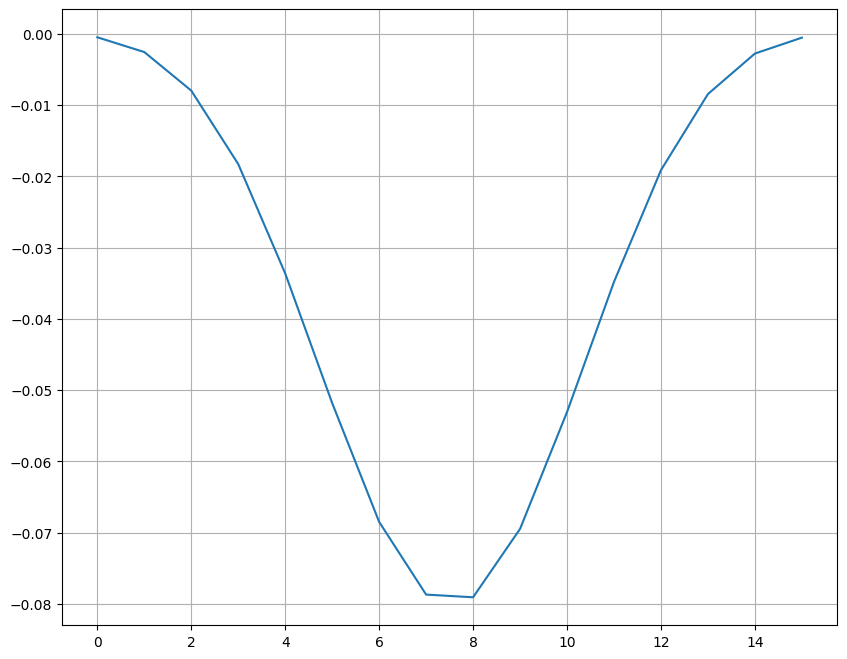

In [9]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Source code tersebut menggunakan library Matplotlib untuk memvisualisasikan koefisien filter FIR yang telah dioptimasi.

1.	plt.figure(figsize=(10,8)): Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
2.	plt.plot(h): Memplot koefisien filter FIR h yang telah dioptimasi sebelumnya. Sumbu x merepresentasikan indeks dari koefisien filter, dan sumbu y merepresentasikan nilai dari koefisien filter.
3.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menampilkan sebuah plot yang memvisualisasikan koefisien filter FIR yang telah dioptimasi. Plot ini dapat membantu memahami bagaimana nilai-nilai koefisien filter FIR yang dioptimasi membentuk respons frekuensi yang diinginkan.

Sumbu x pada plot merepresentasikan indeks dari koefisien filter FIR, dimulai dari 0 hingga 15 (karena panjang filter adalah 16). Sumbu y merepresentasikan nilai dari koefisien filter FIR yang telah dioptimasi.

Plot ini dapat memberikan gambaran visual tentang bentuk koefisien filter FIR yang dihasilkan dari proses optimasi. Jika plot terlihat sesuai dengan yang diharapkan, maka koefisien filter FIR yang dioptimasi dapat digunakan untuk mengimplementasikan filter FIR yang memenuhi spesifikasi yang diinginkan.

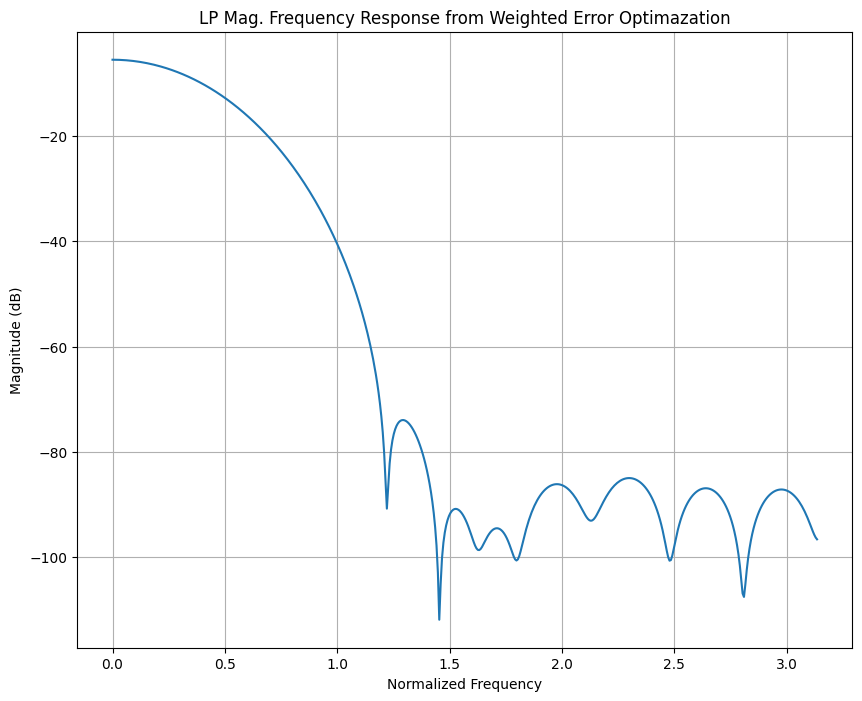

In [10]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

Source code tersebut menggunakan library SciPy dan Matplotlib untuk memvisualisasikan respons frekuensi dalam domain frekuensi dari filter FIR (Finite Impulse Response) yang telah dioptimasi.

1.	omega, H =signal.freqz(h): Menghitung respons frekuensi H dari filter FIR dengan koefisien h yang telah dioptimasi sebelumnya. Fungsi freqz dari library SciPy digunakan untuk mendapatkan vektor frekuensi omega (dalam rad/sampel) dan respons frekuensi kompleks H.
2.	plt.figure(figsize=(10,8)): Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
3.	plt.plot(omega, 20*np.log10(abs(H)+1e-6)): Memplot respons frekuensi dalam skala desibel (dB). abs(H) mengambil nilai absolut dari respons frekuensi kompleks. 1e-6 ditambahkan untuk menghindari error log dari nilai 0. 20*np.log10(...) mengonversi nilai ke skala desibel.
4.	plt.xlabel('Normalized Frequency'): Memberi label untuk sumbu x dengan 'Normalized Frequency'.
5.	plt.ylabel('Magnitude (dB)'): Memberi label untuk sumbu y dengan 'Magnitude (dB)'.
6.	plt.title('LP Mag. Frequency Response from Weighted Error Optimazation'): Memberi judul untuk plot dengan 'LP Mag. Frequency Response from Weighted Error Optimazation'.
7.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menampilkan sebuah plot yang menunjukkan respons frekuensi dari filter FIR yang telah dioptimasi. Plot ini memvisualisasikan magnitude (dalam dB) dari respons frekuensi terhadap frekuensi yang dinormalisasi (dari 0 hingga π rad/sampel).

Sumbu x merepresentasikan frekuensi yang dinormalisasi, dan sumbu y merepresentasikan magnitude dari respons frekuensi dalam skala desibel (dB). Judul plot memberikan informasi bahwa respons frekuensi ini diperoleh dari optimasi dengan menggunakan metode pembobotan error (Weighted Error Optimization).

Plot ini dapat digunakan untuk memverifikasi apakah respons frekuensi dari filter FIR yang dioptimasi memenuhi spesifikasi yang diinginkan, seperti band lolos, band stop, dan band transisi. Jika plot sesuai dengan yang diharapkan, maka koefisien filter FIR yang dioptimasi dapat digunakan untuk mengimplementasikan filter FIR yang memenuhi spesifikasi yang diinginkan.

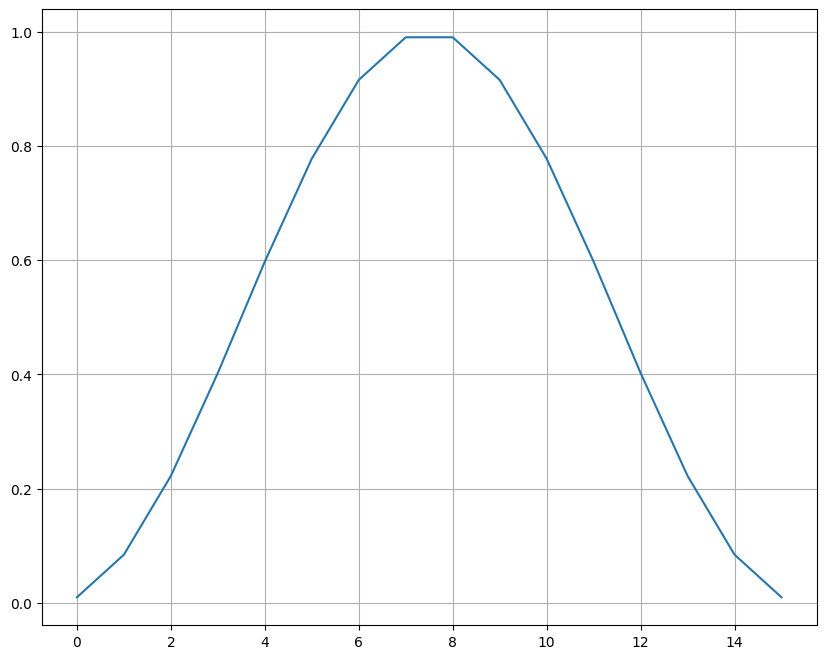

In [11]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Source code tersebut digunakan untuk membuat koefisien filter FIR (Finite Impulse Response) dengan menggunakan window Hamming dan memvisualisasikannya.

1.	h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5)): Ini adalah persamaan untuk menghasilkan koefisien filter FIR dengan menggunakan window Hamming. Persamaan ini menghasilkan array dengan 16 elemen yang merupakan nilai koefisien filter.
  *   np.arange(16) membuat array NumPy dengan 16 elemen dari 0 hingga 15.
  *   (np.arange(16)+0.5) menggeser array tersebut agar indeksnya dimulai dari 0.5 hingga 15.5.
  *   2*np.pi/16 merupakan konstanta untuk menghasilkan periode yang sesuai dengan panjang filter (16).
  *   np.cos(...) menghitung nilai kosinus dari setiap elemen array yang digeser.
  *   0.5-0.5*... mengalikan nilai kosinus dengan 0.5 dan menguranginya dari 0.5, sehingga menghasilkan window Hamming.
2.	plt.figure(figsize=(10,8)): Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
3.	plt.plot(h): Memplot koefisien filter FIR h yang dibuat menggunakan window Hamming. Sumbu x merepresentasikan indeks dari koefisien filter, dan sumbu y merepresentasikan nilai dari koefisien filter.
4.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menampilkan sebuah plot yang memvisualisasikan koefisien filter FIR yang dibuat menggunakan window Hamming. Plot ini dapat membantu memahami bentuk dari koefisien filter FIR yang dihasilkan oleh window Hamming.

Sumbu x pada plot merepresentasikan indeks dari koefisien filter FIR, dimulai dari 0 hingga 15 (karena panjang filter adalah 16). Sumbu y merepresentasikan nilai dari koefisien filter FIR yang dibuat menggunakan window Hamming.

Window Hamming digunakan dalam desain filter FIR untuk mengurangi efek kebocoran spektral (spectral leakage) dan meminimalkan lonjakan (ringing) pada respons impuls filter. Window ini memberikan bentuk yang lebih halus dan simetris pada koefisien filter FIR dibandingkan dengan window yang lain, seperti window Rectangular.

Plot ini dapat memberikan gambaran visual tentang bentuk koefisien filter FIR yang dihasilkan oleh window Hamming. Dengan memahami bentuk koefisien filter, Anda dapat mengetahui bagaimana respons frekuensi dari filter FIR yang dihasilkan oleh window Hamming.

In [12]:
def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

Source code tersebut merupakan sebuah fungsi Python bernama freqz yang digunakan untuk memvisualisasikan respons frekuensi (magnitude dan fase) dari sebuah filter FIR (Finite Impulse Response).

1.	def freqz(x): Mendefinisikan sebuah fungsi bernama freqz yang menerima satu argumen x (koefisien filter FIR).
2.	f, H = signal.freqz(x) Menghitung respons frekuensi kompleks H dan vektor frekuensi f dari filter FIR dengan koefisien x menggunakan fungsi freqz dari library SciPy.
3.	fNorm = f/np.pi Menormalisasi vektor frekuensi f dengan membaginya dengan π.
4.	hdB = 20 * np.log10(abs(H)+1e-5) Menghitung magnitude respons frekuensi dalam skala desibel (dB). 1e-5 ditambahkan untuk menghindari error log dari nilai 0.
5.	plt.figure(figsize=(10,8)) Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
6.	plt.subplot(211) Membuat subplot pertama (subplot atas) untuk memplot magnitude respons frekuensi.
7.	plt.title('Magnitude'), plt.plot(f, hdB, 'b'), plt.axis(...), plt.grid(True), plt.xlabel(...), plt.ylabel(...) Mengatur judul, memplot magnitude respons frekuensi, menyetel batas sumbu, menambahkan grid, dan memberi label pada sumbu x dan y.
8.	plt.subplot(212) Membuat subplot kedua (subplot bawah) untuk memplot fase respons frekuensi.
9.	plt.title('Phase'), angles = np.unwrap(np.angle(H)), anglesGrad = (360 * angles)/(2*np.pi), plt.plot(f, anglesGrad, 'b'), plt.axis(...), plt.grid(True), plt.xlabel(...), plt.ylabel(...) Mengatur judul, menghitung fase respons frekuensi dalam derajat, memplot fase respons frekuensi, menyetel batas sumbu, menambahkan grid, dan memberi label pada sumbu x dan y.
10.	plt.tight_layout() Menyesuaikan tata letak subplot agar tidak terpotong.

Ketika fungsi freqz dipanggil dengan argumen x yang merupakan koefisien filter FIR, ia akan menampilkan dua subplot dalam satu figure:

1.	Subplot atas menunjukkan magnitude respons frekuensi (dalam dB) dari filter FIR dengan koefisien x. Sumbu x merepresentasikan frekuensi yang dinormalisasi (dari 0 hingga π rad/sampel), dan sumbu y merepresentasikan magnitude respons frekuensi dalam desibel (dB).
2.	Subplot bawah menunjukkan fase respons frekuensi (dalam derajat) dari filter FIR dengan koefisien x. Sumbu x merepresentasikan frekuensi yang dinormalisasi (dari 0 hingga π rad/sampel), dan sumbu y merepresentasikan fase respons frekuensi dalam derajat.

Fungsi ini dapat digunakan untuk memvisualisasikan dan menganalisis respons frekuensi dari filter FIR yang dihasilkan oleh koefisien x. Dengan memvisualisasikan magnitude dan fase respons frekuensi, Anda dapat mengevaluasi kinerja filter FIR dan memastikan bahwa filter memenuhi spesifikasi yang diinginkan.

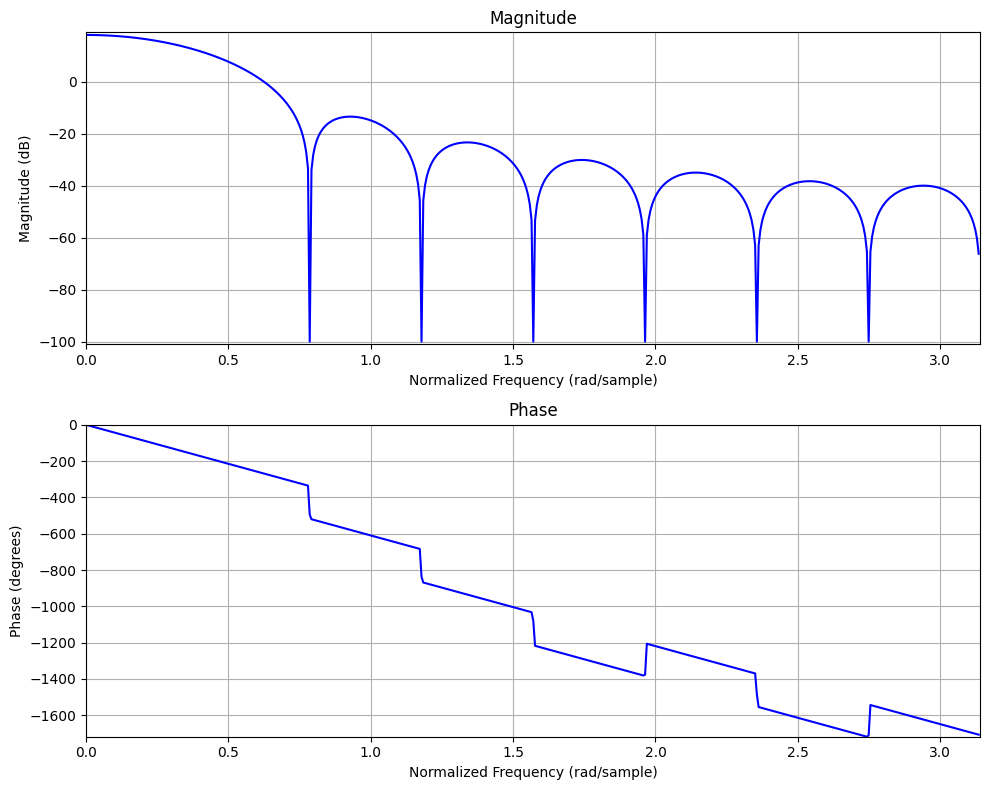

In [13]:
freqz(h)

Source code freqz(h) memanggil fungsi freqz yang telah didefinisikan sebelumnya dengan argumen h. Fungsi freqz digunakan untuk memvisualisasikan respons frekuensi (magnitude dan fase) dari sebuah filter FIR (Finite Impulse Response).

Dalam hal ini, h adalah variabel yang berisi koefisien filter FIR yang akan digunakan untuk menghitung dan memvisualisasikan respons frekuensi. Ketika freqz(h) dijalankan, fungsi freqz akan melakukan langkah-langkah berikut:

1.	Menghitung respons frekuensi kompleks H dan vektor frekuensi f dari filter FIR dengan koefisien h menggunakan fungsi signal.freqz dari library SciPy.
2.	Menormalisasi vektor frekuensi f dengan membaginya dengan π.
3.	Menghitung magnitude respons frekuensi dalam skala desibel (dB) dari H.
4.	Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
5.	Membuat subplot atas dan memplot magnitude respons frekuensi H dalam skala dB terhadap frekuensi yang dinormalisasi.
6.	Membuat subplot bawah dan memplot fase respons frekuensi H dalam derajat terhadap frekuensi yang dinormalisasi.

Setelah freqz(h) dijalankan, program akan menampilkan sebuah figure dengan dua subplot: subplot atas menunjukkan magnitude respons frekuensi, dan subplot bawah menunjukkan fase respons frekuensi. Visualisasi ini dapat membantu menganalisis kinerja filter FIR dengan koefisien h dan memastikan bahwa filter memenuhi spesifikasi yang diinginkan.'

Dengan demikian, freqz(h) memanggil fungsi freqz dengan argumen h (koefisien filter FIR) untuk memvisualisasikan respons frekuensi dari filter FIR tersebut dalam domain frekuensi. Ini merupakan langkah penting dalam proses desain dan analisis filter FIR.

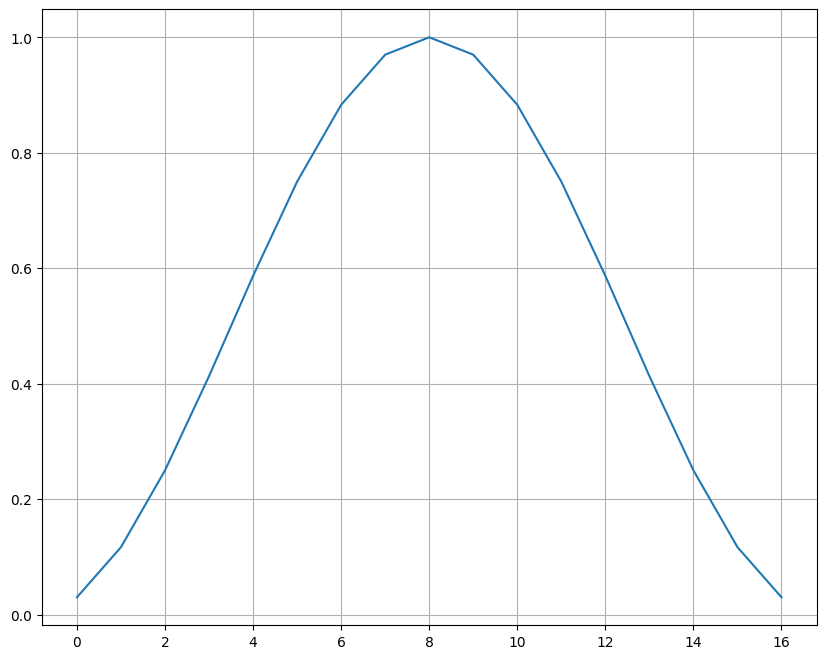

In [14]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Source code tersebut digunakan untuk membuat koefisien filter FIR (Finite Impulse Response) dengan menggunakan window Hamming dan memvisualisasikannya.

1.	h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1)): Ini adalah persamaan untuk menghasilkan koefisien filter FIR dengan menggunakan window Hamming. Persamaan ini menghasilkan array dengan 17 elemen yang merupakan nilai koefisien filter.
  *   np.arange(17) membuat array NumPy dengan 17 elemen dari 0 hingga 16.
  *   (np.arange(17)+1) menggeser array tersebut agar indeksnya dimulai dari 1 hingga 17.
  *   2*np.pi/18 merupakan konstanta untuk menghasilkan periode yang sesuai dengan panjang filter (17).
  *   np.cos(...) menghitung nilai kosinus dari setiap elemen array yang digeser.
  *   0.5-0.5*... mengalikan nilai kosinus dengan 0.5 dan menguranginya dari 0.5, sehingga menghasilkan window Hamming.
2.	plt.figure(figsize=(10,8)): Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
3.	plt.plot(h): Memplot koefisien filter FIR h yang dibuat menggunakan window Hamming. Sumbu x merepresentasikan indeks dari koefisien filter, dan sumbu y merepresentasikan nilai dari koefisien filter.
4.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menampilkan sebuah plot yang memvisualisasikan koefisien filter FIR yang dibuat menggunakan window Hamming. Plot ini dapat membantu memahami bentuk dari koefisien filter FIR yang dihasilkan oleh window Hamming.

Sumbu x pada plot merepresentasikan indeks dari koefisien filter FIR, dimulai dari 0 hingga 16 (karena panjang filter adalah 17). Sumbu y merepresentasikan nilai dari koefisien filter FIR yang dibuat menggunakan window Hamming.

Window Hamming digunakan dalam desain filter FIR untuk mengurangi efek kebocoran spektral (spectral leakage) dan meminimalkan lonjakan (ringing) pada respons impuls filter. Window ini memberikan bentuk yang lebih halus dan simetris pada koefisien filter FIR dibandingkan dengan window yang lain, seperti window Rectangular.

Plot ini dapat memberikan gambaran visual tentang bentuk koefisien filter FIR yang dihasilkan oleh window Hamming. Dengan memahami bentuk koefisien filter, Anda dapat mengetahui bagaimana respons frekuensi dari filter FIR yang dihasilkan oleh window Hamming.

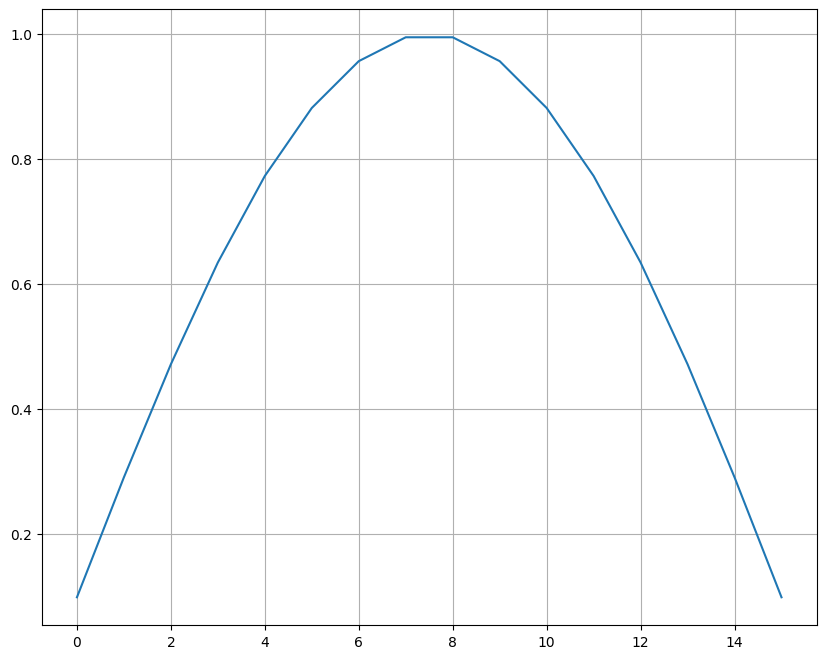

In [15]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

Source code tersebut digunakan untuk membuat sebuah sinyal sinus dengan periode 32 sampel dan memvisualisasikannya.

1.	s=np.sin(np.pi/16*(np.arange(16)+0.5)): Ini adalah persamaan untuk menghasilkan sebuah sinyal sinus dengan periode 32 sampel.
*   np.arange(16) membuat array NumPy dengan 16 elemen dari 0 hingga 15.
*   (np.arange(16)+0.5) menggeser array tersebut agar indeksnya dimulai dari 0.5 hingga 15.5.
*   np.pi/16 merupakan konstanta yang digunakan untuk menghasilkan periode yang sesuai dengan 32 sampel.
*   np.sin(...) menghitung nilai sinus dari setiap elemen array yang digeser.
2.	plt.figure(figsize=(10,8)): Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
3.	plt.plot(s): Memplot sinyal sinus s. Sumbu x merepresentasikan indeks dari sampel, dan sumbu y merepresentasikan nilai amplitudo dari sinyal sinus.
4.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menampilkan sebuah plot yang memvisualisasikan sinyal sinus dengan periode 32 sampel. Plot ini dapat membantu memahami bentuk dari sinyal sinus yang dihasilkan.

Sumbu x pada plot merepresentasikan indeks dari sampel, dimulai dari 0 hingga 15 (karena panjang sinyal adalah 16 sampel). Sumbu y merepresentasikan nilai amplitudo dari sinyal sinus, antara -1 dan 1.

Sinyal sinus ini memiliki periode 32 sampel karena konstanta np.pi/16 dalam persamaan menghasilkan satu periode sinyal yang terdiri dari 32 sampel. Pergeseran +0.5 pada indeks array digunakan untuk menggeser sinyal sinus agar dimulai dari nilai 0 pada indeks sampel 0.5.

Plot ini dapat memberikan gambaran visual tentang bentuk sinyal sinus yang dihasilkan oleh persamaan tersebut. Dengan memahami bentuk sinyal sinus, Anda dapat mengetahui bagaimana respons filter FIR terhadap sinyal sinus dengan periode 32 sampel.

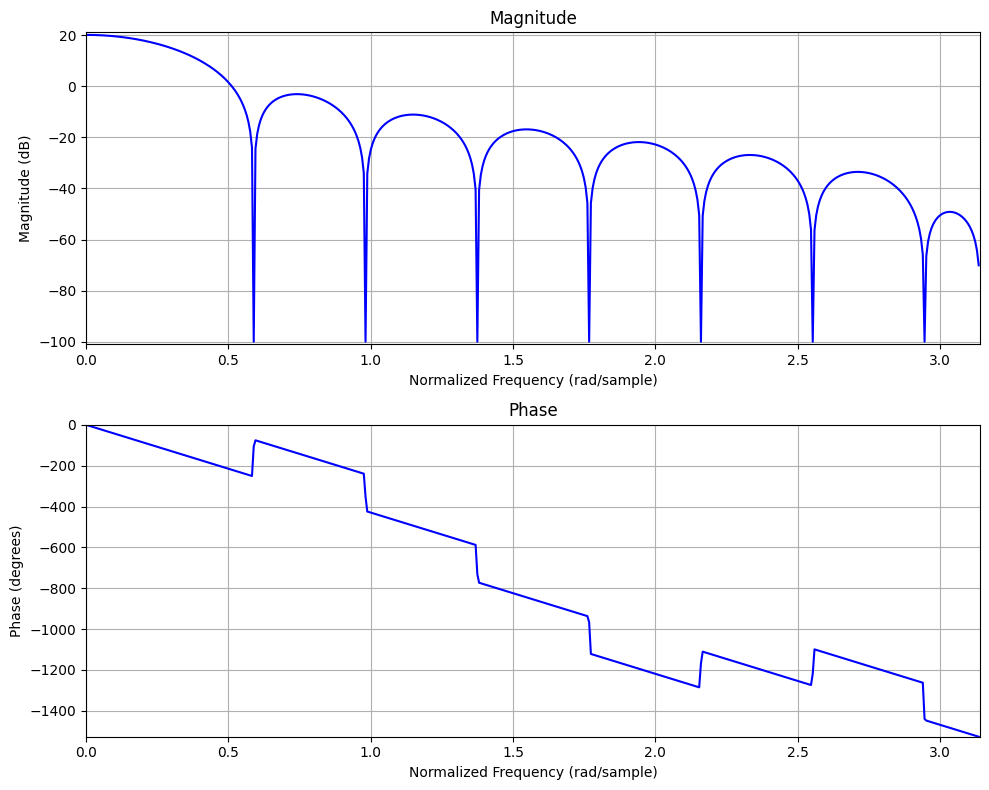

In [16]:
freqz(s)

Source code freqz(s) memanggil fungsi freqz yang telah didefinisikan sebelumnya dengan argumen s. Fungsi freqz digunakan untuk memvisualisasikan respons frekuensi (magnitude dan fase) dari sebuah sinyal atau filter.

Dalam hal ini, s adalah variabel yang berisi sinyal sinus dengan periode 32 sampel yang telah dibuat sebelumnya. Ketika freqz(s) dijalankan, fungsi freqz akan melakukan langkah-langkah berikut:

1.	Menghitung respons frekuensi kompleks H dan vektor frekuensi f dari sinyal s menggunakan fungsi signal.freqz dari library SciPy.
2.	Menormalisasi vektor frekuensi f dengan membaginya dengan π.
3.	Menghitung magnitude respons frekuensi dalam skala desibel (dB) dari H.
4.	Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
5.	Membuat subplot atas dan memplot magnitude respons frekuensi H dalam skala dB terhadap frekuensi yang dinormalisasi.
6.	Membuat subplot bawah dan memplot fase respons frekuensi H dalam derajat terhadap frekuensi yang dinormalisasi.

Setelah freqz(s) dijalankan, program akan menampilkan sebuah figure dengan dua subplot: subplot atas menunjukkan magnitude respons frekuensi, dan subplot bawah menunjukkan fase respons frekuensi dari sinyal sinus s.

Visualisasi respons frekuensi ini dapat membantu menganalisis karakteristik frekuensi dari sinyal sinus s. Magnitude respons frekuensi akan menunjukkan kekuatan dari komponen frekuensi dalam sinyal, sedangkan fase respons frekuensi akan menunjukkan pergeseran fase dari setiap komponen frekuensi.

Dengan demikian, freqz(s) memanggil fungsi freqz dengan argumen s (sinyal sinus) untuk memvisualisasikan respons frekuensi dari sinyal tersebut dalam domain frekuensi. Ini dapat membantu memahami karakteristik frekuensi dari sinyal sinus dan bagaimana sinyal tersebut akan berinteraksi dengan filter FIR.

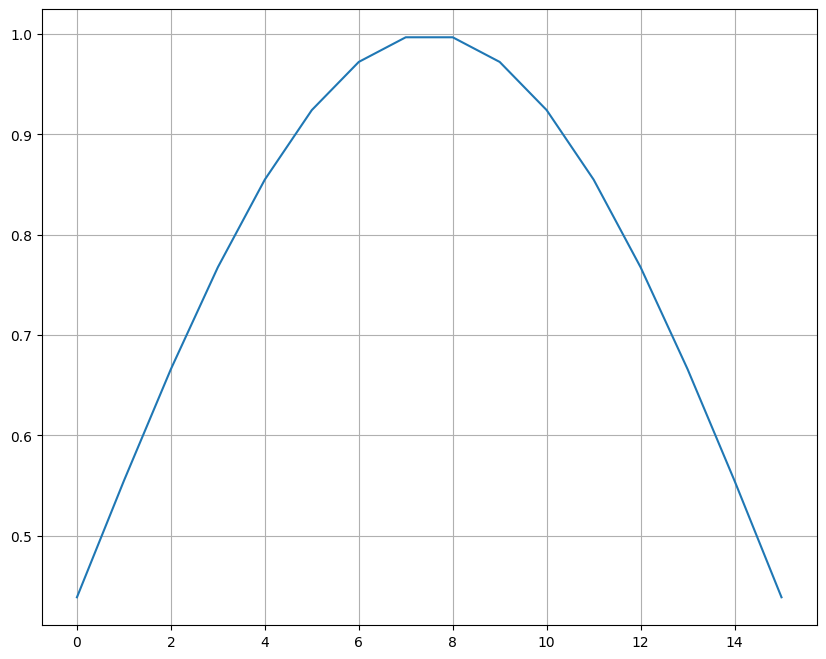

In [17]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Source code tersebut digunakan untuk membuat koefisien filter FIR (Finite Impulse Response) dengan menggunakan window Kaiser dan memvisualisasikannya.

1.	hk=np.kaiser(16,2): Ini adalah fungsi dari NumPy yang menghasilkan koefisien filter FIR dengan menggunakan window Kaiser. Fungsi np.kaiser menerima dua argumen:
  *   16 adalah panjang filter (jumlah koefisien filter).
  *   2 adalah parameter beta yang menentukan bentuk window Kaiser. Nilai beta yang lebih besar akan menghasilkan sidelobe yang lebih kecil pada respons frekuensi, tetapi transisi akan lebih landai.
2.	plt.figure(figsize=(10,8)): Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
3.	plt.plot(hk): Memplot koefisien filter FIR hk yang dibuat menggunakan window Kaiser. Sumbu x merepresentasikan indeks dari koefisien filter, dan sumbu y merepresentasikan nilai dari koefisien filter.
4.	plt.grid(): Menambahkan grid pada plot.

Ketika program dijalankan, ia akan menampilkan sebuah plot yang memvisualisasikan koefisien filter FIR yang dibuat menggunakan window Kaiser. Plot ini dapat membantu memahami bentuk dari koefisien filter FIR yang dihasilkan oleh window Kaiser.

Sumbu x pada plot merepresentasikan indeks dari koefisien filter FIR, dimulai dari 0 hingga 15 (karena panjang filter adalah 16). Sumbu y merepresentasikan nilai dari koefisien filter FIR yang dibuat menggunakan window Kaiser.

Window Kaiser digunakan dalam desain filter FIR untuk menghasilkan respons frekuensi dengan sidelobe yang lebih rendah dan transisi yang lebih landai dibandingkan dengan window yang lain, seperti window Hamming atau Hanning. Dengan memilih nilai beta yang sesuai, window Kaiser dapat meminimalkan kebocoran spektral (spectral leakage) dan lonjakan (ringing) pada respons impuls filter.

Plot ini dapat memberikan gambaran visual tentang bentuk koefisien filter FIR yang dihasilkan oleh window Kaiser. Dengan memahami bentuk koefisien filter, Anda dapat mengetahui bagaimana respons frekuensi dari filter FIR yang dihasilkan oleh window Kaiser.

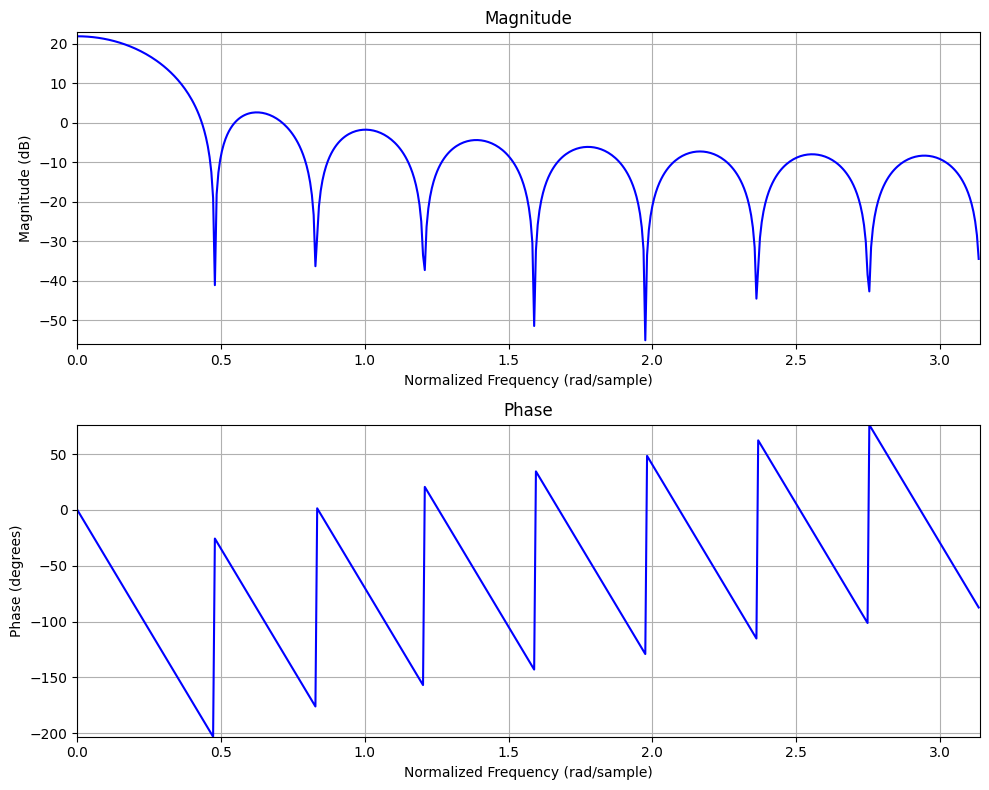

In [18]:
freqz(hk)

Source code freqz(hk) memanggil fungsi freqz yang telah didefinisikan sebelumnya dengan argumen hk. Fungsi freqz digunakan untuk memvisualisasikan respons frekuensi (magnitude dan fase) dari sebuah filter FIR (Finite Impulse Response).

Dalam hal ini, hk adalah variabel yang berisi koefisien filter FIR yang dibuat menggunakan window Kaiser. Ketika freqz(hk) dijalankan, fungsi freqz akan melakukan langkah-langkah berikut:

1.	Menghitung respons frekuensi kompleks H dan vektor frekuensi f dari filter FIR dengan koefisien hk menggunakan fungsi signal.freqz dari library SciPy.
2.	Menormalisasi vektor frekuensi f dengan membaginya dengan π.
3.	Menghitung magnitude respons frekuensi dalam skala desibel (dB) dari H.
4.	Membuat sebuah figure baru dengan ukuran 10 inci x 8 inci.
5.	Membuat subplot atas dan memplot magnitude respons frekuensi H dalam skala dB terhadap frekuensi yang dinormalisasi.
6.	Membuat subplot bawah dan memplot fase respons frekuensi H dalam derajat terhadap frekuensi yang dinormalisasi.

Setelah freqz(hk) dijalankan, program akan menampilkan sebuah figure dengan dua subplot: subplot atas menunjukkan magnitude respons frekuensi, dan subplot bawah menunjukkan fase respons frekuensi dari filter FIR dengan koefisien hk.

Visualisasi respons frekuensi ini dapat membantu menganalisis kinerja filter FIR dengan koefisien hk yang dibuat menggunakan window Kaiser. Magnitude respons frekuensi akan menunjukkan karakteristik filter seperti band lolos, band stop, dan transisi antara keduanya. Fase respons frekuensi juga dapat memberikan informasi penting tentang kinerja filter.

Dengan memvisualisasikan respons frekuensi, Anda dapat mengevaluasi apakah filter FIR dengan koefisien hk memenuhi spesifikasi yang diinginkan, seperti spesifikasi band lolos, band stop, dan sidelobe. Jika respons frekuensi sesuai dengan yang diharapkan, maka koefisien filter FIR hk dapat digunakan untuk mengimplementasikan filter FIR yang diinginkan.

Dengan demikian, freqz(hk) memanggil fungsi freqz dengan argumen hk (koefisien filter FIR yang dibuat dengan window Kaiser) untuk memvisualisasikan respons frekuensi dari filter tersebut dalam domain frekuensi. Ini merupakan langkah penting dalam proses desain dan analisis filter FIR.

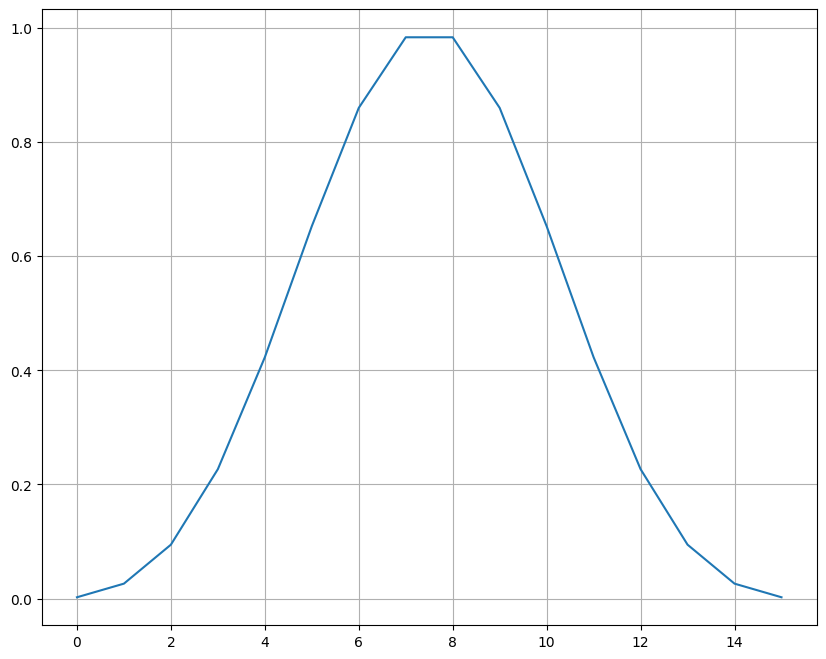

In [19]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Source code tersebut menggunakan library NumPy dan Matplotlib dari Python untuk membuat dan memvisualisasikan sebuah window (jendela) Kaiser.

1.	hk=np.kaiser(16,8): Fungsi np.kaiser dari NumPy digunakan untuk menghasilkan sebuah window Kaiser dengan panjang 16 dan parameter beta 8. Window Kaiser adalah sebuah window yang meminimalkan kebocoran spektral pada sisi-sisi utama.
2.	plt.figure(figsize=(10,8)): Membuat sebuah figure (gambar) baru dengan ukuran 10 inci lebar dan 8 inci tinggi.
3.	plt.plot(hk): Memplot nilai-nilai dari window Kaiser hk yang telah dibuat sebelumnya.
4.	plt.grid(): Menambahkan grid pada gambar plot.

Source code ini akan menghasilkan sebuah plot yang menampilkan window Kaiser dengan panjang 16 dan parameter beta 8 pada sebuah gambar berukuran 10x8 inci, beserta grid.

Window Kaiser sering digunakan dalam pemrosesan sinyal digital untuk menghaluskan diskontinuitas di tepian window dengan cara meminimalkan kebocoran spektral. Hal ini penting dalam beberapa aplikasi seperti pemfilteran sinyal dan analisis spektrum.

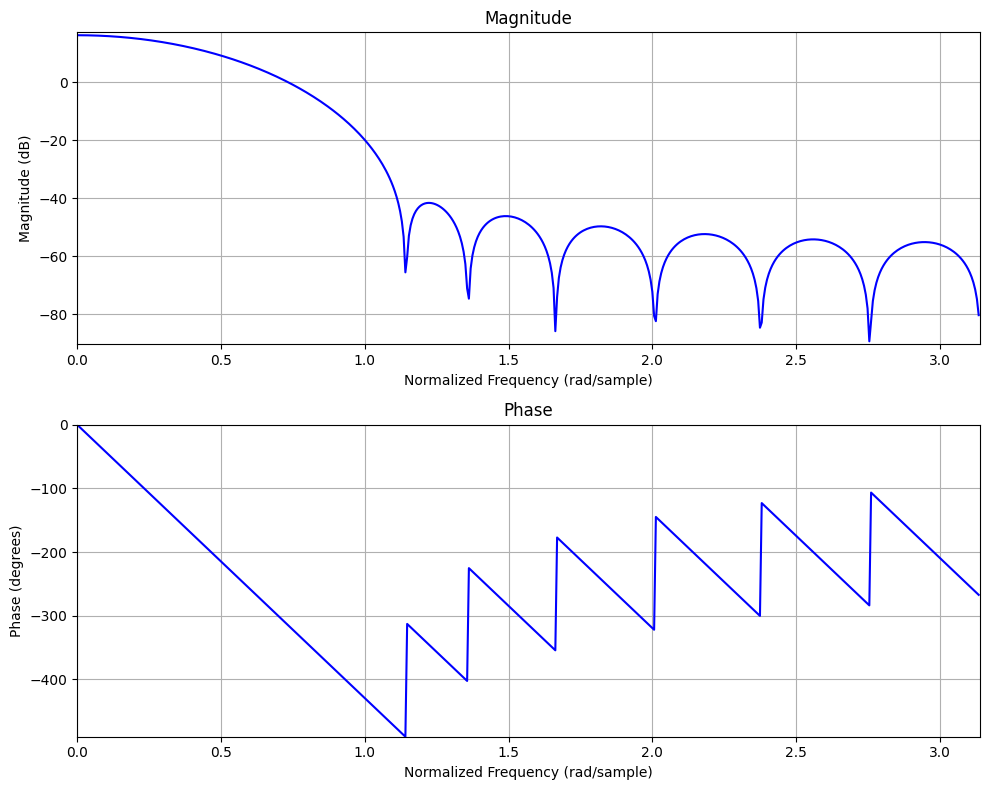

In [20]:
freqz(hk)

freqz(hk) adalah sebuah fungsi di dalam library Signal Processing dari SciPy untuk Python yang digunakan untuk menghitung respon frekuensi dari sebuah sistem linear tidak-varian waktu (LTI) dengan menggunakan transformasi z.

1.	b: Koefisien numerator dari sistem LTI yang akan dihitung respon frekuensinya. Dalam kasus ini, hk adalah window Kaiser yang telah dibuat sebelumnya.
2.	a: Koefisien denominator dari sistem LTI (opsional, defaultnya 1).
3.	worN: Vektor frekuensi di mana respon frekuensi akan dihitung (opsional).
4.	whole: Menentukan apakah seluruh respon frekuensi akan dikembalikan atau hanya setengahnya (defaultnya False).
5.	plot: Menghasilkan plot respon frekuensi jika bernilai True (opsional).
6.	fs: Frekuensi sampel (defaultnya 2*pi rad/sampel).

freqz(hk) akan menghitung dan mengembalikan respon frekuensi dari window Kaiser hk yang telah dibuat sebelumnya. Ini berguna untuk menganalisis karakteristik frekuensi dari suatu window atau filter sebelum diaplikasikan pada sinyal.